In [1]:
# Load libraries
suppressPackageStartupMessages({
  library(readr)
  library(dplyr)
  library(ggplot2)
})

# Load the dataset (correct path)
data <- read_csv("/kaggle/input/heart-disease-cleaned-csv/heart_disease_cleaned.csv - heart_disease.csv")

# Clean up columns
data$gender <- ifelse(data$sex == 1, "Male", "Female")
data$heart_status <- ifelse(data$heart_disease == 1, "Has Disease", "No Disease")


Rows: 303 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
# Load your cleaned dataset correctly (adjusted path)
data <- read_csv("/kaggle/input/heart-disease-cleaned-csv/heart_disease_cleaned.csv - heart_disease.csv")


Rows: 303 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Clean and transform key columns
data$gender <- ifelse(data$sex == 1, "Male", "Female")
data$heart_status <- ifelse(data$heart_disease == 1, "Has Disease", "No Disease")


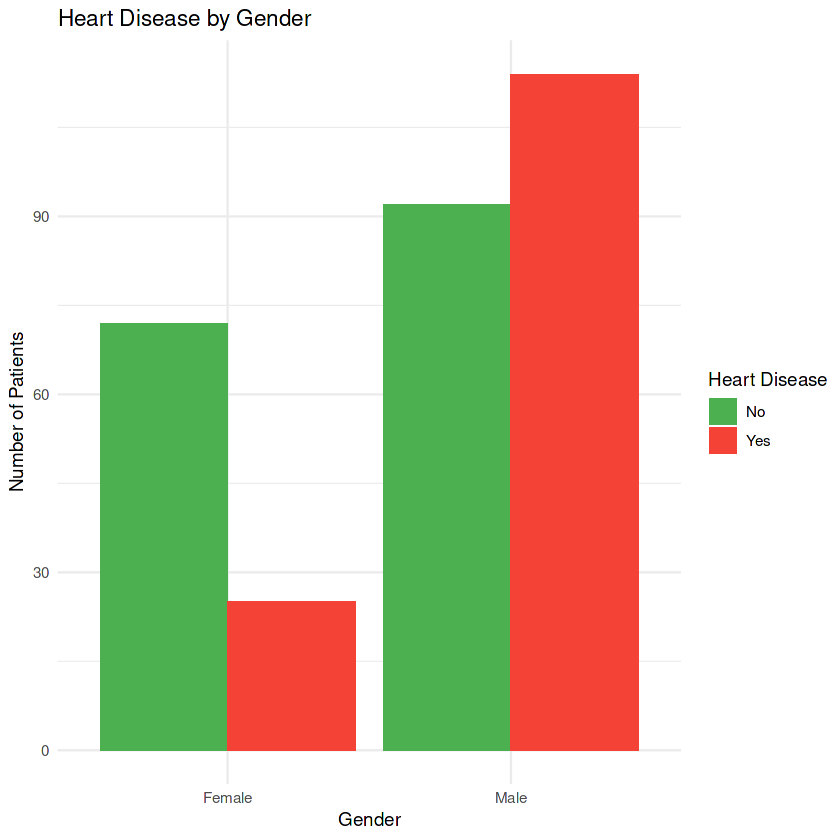

In [4]:
# Chart 1: Bar chart of heart disease cases by gender
# ---------------------------------------------------

# Convert 'sex' column to readable labels
data$gender <- ifelse(data$sex == 1, "Male", "Female")

# Create a bar chart using ggplot2
library(ggplot2)

ggplot(data, aes(x = gender, fill = factor(heart_disease))) +
  geom_bar(position = "dodge") +
  labs(
    title = "Heart Disease by Gender",
    x = "Gender",
    y = "Number of Patients",
    fill = "Heart Disease"
  ) +
  scale_fill_manual(values = c("0" = "#4CAF50", "1" = "#F44336"),
                    labels = c("No", "Yes")) +
  theme_minimal()


## Heart Disease by Gender

This bar chart shows the distribution of heart disease cases by gender. Males are more frequently diagnosed with heart disease compared to females in this dataset. This supports prior research showing that biological sex is a key factor in cardiovascular risk.


In [5]:
# Save the last plot as a PNG image
ggsave("heart_disease_by_gender.png", width = 6, height = 4)


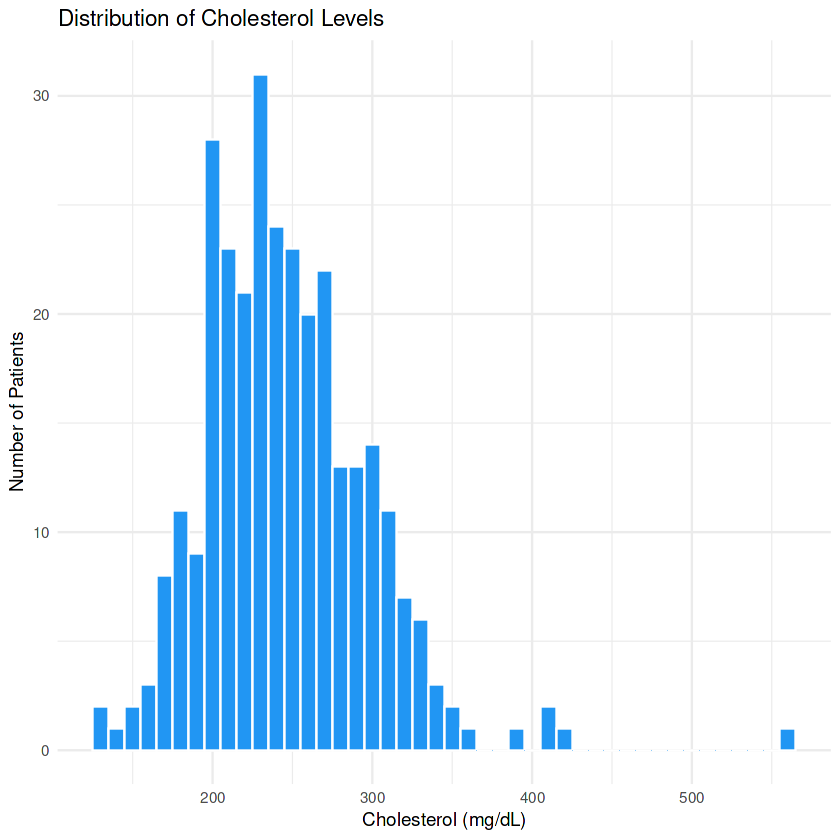

In [6]:
# Chart 2: Histogram of cholesterol levels
# -----------------------------------------

# Plot a histogram of the 'chol' (cholesterol) variable
ggplot(data, aes(x = chol)) +
  geom_histogram(binwidth = 10, fill = "#2196F3", color = "white") +
  labs(
    title = "Distribution of Cholesterol Levels",
    x = "Cholesterol (mg/dL)",
    y = "Number of Patients"
  ) +
  theme_minimal()


## Distribution of Cholesterol Levels

This histogram displays the distribution of cholesterol levels among patients. The majority of individuals fall between 200–300 mg/dL, with a right-skewed tail extending toward higher values. This suggests elevated cholesterol is common in this heart-related population.


In [7]:
# Save the histogram as a PNG image
ggsave("cholesterol_distribution.png", width = 6, height = 4)


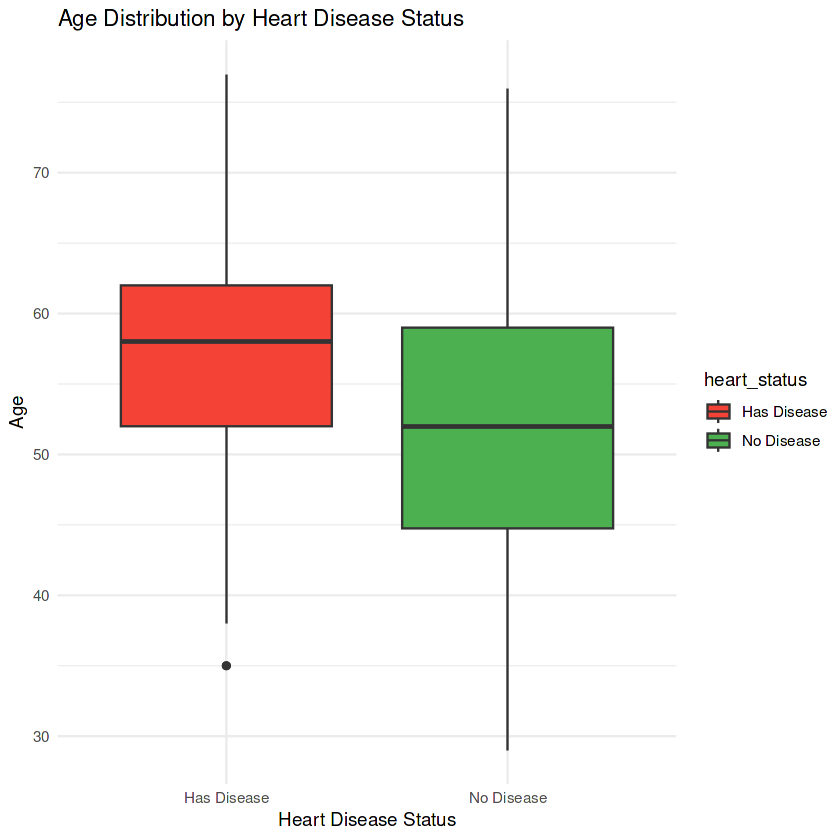

In [8]:
# Chart 3: Boxplot of age by heart disease status
# ------------------------------------------------

# Convert heart_disease to readable labels
data$heart_status <- ifelse(data$heart_disease == 1, "Has Disease", "No Disease")

# Create a boxplot comparing age by heart disease status
ggplot(data, aes(x = heart_status, y = age, fill = heart_status)) +
  geom_boxplot() +
  labs(
    title = "Age Distribution by Heart Disease Status",
    x = "Heart Disease Status",
    y = "Age"
  ) +
  scale_fill_manual(values = c("No Disease" = "#4CAF50", "Has Disease" = "#F44336")) +
  theme_minimal()


## Age Distribution by Heart Disease Status

The boxplot compares age distributions between patients with and without heart disease. On average, patients with heart disease tend to be older, with a tighter interquartile range. This supports the known trend of heart disease risk increasing with age.


In [9]:
# Save the boxplot as a PNG
ggsave("age_by_heart_disease.png", width = 6, height = 4)


In [10]:
# Select numeric columns only
numeric_data <- data %>%
  select(age, trestbps, chol, thalach, oldpeak, heart_disease)

# Calculate correlation matrix
cor_matrix <- round(cor(numeric_data, use = "complete.obs"), 2)

# Convert to long format for ggplot
cor_data <- as.data.frame(as.table(cor_matrix))
colnames(cor_data) <- c("Var1", "Var2", "Correlation")



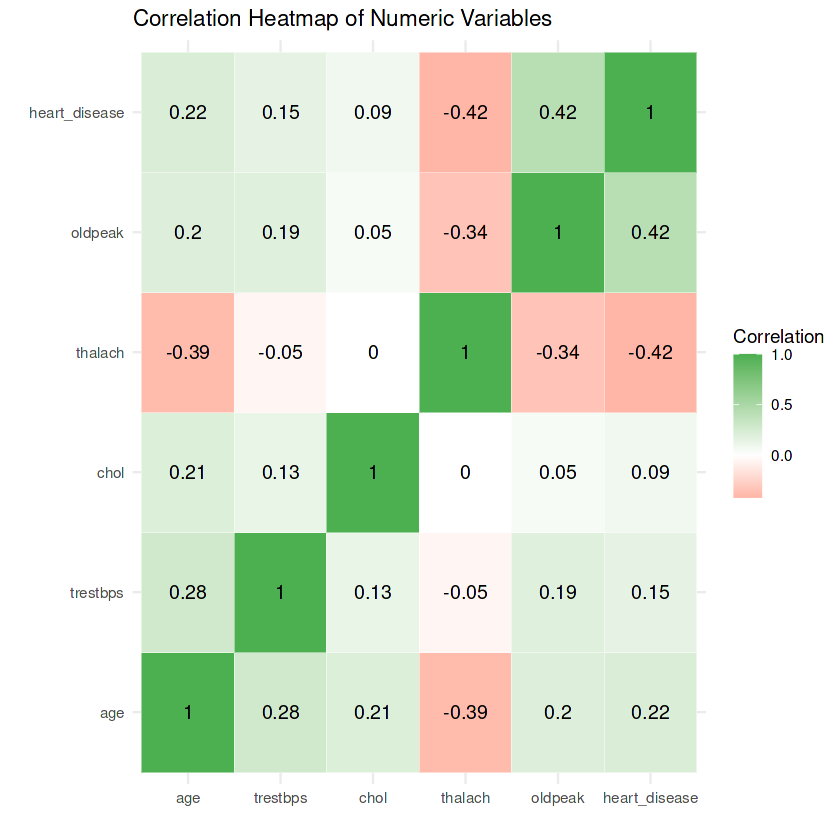

In [11]:
# Correlation heatmap using ggplot2
ggplot(cor_data, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Correlation), size = 4) +
  scale_fill_gradient2(low = "#F44336", high = "#4CAF50", mid = "white", midpoint = 0) +
  labs(
    title = "Correlation Heatmap of Numeric Variables",
    x = "",
    y = ""
  ) +
  theme_minimal()


## Correlation Heatmap of Numeric Variables

This heatmap shows pairwise correlations between numeric variables. Positive correlations appear green; negative, red. Notable findings include:
- Age is positively correlated with resting blood pressure and heart disease.
- Thalach (maximum heart rate) is negatively correlated with both age and heart disease.
- Oldpeak (ST depression) is moderately positively correlated with heart disease.


In [12]:
ggsave("correlation_heatmap.png", width = 6, height = 5)


# Exploratory Data Analysis – Heart Disease Dataset (R)

This project explores the UCI Heart Disease dataset using R and ggplot2 to uncover patterns and relationships in cardiovascular health indicators. The goal is to understand how demographic and clinical factors relate to heart disease outcomes.

### 🔍 Key Objectives:
- Visualize trends in heart disease prevalence across gender and age
- Analyze the distribution of cholesterol levels
- Compare age ranges between patients with and without heart disease
- Identify variable relationships using a correlation heatmap

### 📊 Tools Used:
- R (ggplot2, dplyr)
- Kaggle Notebook
- CSV input file (`heart_disease_cleaned.csv`)

### 📌 Summary Insights:
- Males have a higher prevalence of heart disease than females in this dataset.
- Patients with heart disease tend to be older.
- Cholesterol levels are right-skewed with many patients in the 200–300 mg/dL range.
- Variables such as age, oldpeak, and thalach are moderately correlated with heart disease outcomes.

This EDA builds a foundation for further modeling or dashboard development and demonstrates practical use of R for real-world healthcare data analysis.
